In [1]:
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96.4 MB 1.4 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=a727acd98ba3d900da5a288018ee47d9680466f7eb6cf81d822b59a144e5d638
  Stored in directory: /tmp/pip-ephem-wheel-cache-910xy1e9/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [2]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 44.4 MB/s 
     |████████████████████████████████| 381 kB 53.8 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [4]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 24.3 MB/s 
     |████████████████████████████████| 253 kB 70.1 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 212 kB 74.0 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 2.0 MB 62.8 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 41.1 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 144 kB 44.8 MB/s 
     |████████████████████████████████| 271 kB 47.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 11.1 MB 32.5 MB/s 
     |████████████████████████████████| 80 kB 7.6 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 62 k

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer

import spacy
import en_core_web_md
import scikitplot as skplt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten, SimpleRNN, LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from livelossplot import PlotLossesKeras

import gradio as gr

In [6]:
df = pd.read_csv('/content/drive/MyDrive/df_klasyfikacja.csv')

In [7]:
df

,Unnamed: 0,section,byline,title,abstract,class
0,0,World,By Austin Ramzy,The Invasion of Ukraine: How Russia Attacked a...,Explosions thundered in Ukrainian cities short...,top
1,1,World,"By David D. Kirkpatrick, Maggie Astor and Cati...","Trump Praises Putin, Leaving Republicans in a ...","G.O.P. leaders, while condemning Russia’s inva...",top
2,2,Technology,By Davey Alba and Stuart A. Thompson,‘I’ll Stand on the Side of Russia’: Pro-Putin ...,After marinating in conspiracy theories and Do...,top
3,3,U.S.,"By David E. Sanger, Julian E. Barnes and Kate ...","As Tanks Rolled Into Ukraine, So Did Malware. ...",After years of talks about the need for public...,top
4,4,U.S.,By David E. Sanger and William J. Broad,"Putin Declares a Nuclear Alert, and Biden Seek...",When the Russian leader ordered his nuclear fo...,top
...,...,...,...,...,...,...
10739,10960,Opinion,By Ross Douthat,The Ohio Primary and the Return of the Republi...,How the divides of the party’s 2016 primary ca...,all
10740,10961,Books,By Mark Bowden,An Oil Tanker Is Sabotaged. The Investigator D...,In Matthew Campbell and Kit Chellel’s real-lif...,all
10741,10962,U.S.,By Isabella Grullón Paz,Jail Officer and Murder Suspect Missing After ...,The authorities in Alabama said it was unclear...,all
10742,10963,Sports,By Alan Blinder,"C. Vivian Stringer, Celebrated College Basketb...","Stringer, who reached four Final Fours, won mo...",all


In [8]:
df = df.dropna()

In [9]:
df.drop_duplicates(subset=['title', 'abstract'], inplace=True) #default keep first

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
df['title'][5]

'Why the Chinese Internet Is Cheering Russia’s Invasion'

In [11]:
df[df['title']=='Why the Chinese Internet Is Cheering Russia’s Invasion']

,Unnamed: 0,section,byline,title,abstract,class
5,5,Business,By Li Yuan,Why the Chinese Internet Is Cheering Russia’s ...,As the world overwhelmingly condemns the assau...,top


In [12]:
df = df.reset_index()

In [13]:
df

,index,Unnamed: 0,section,byline,title,abstract,class
0,0,0,World,By Austin Ramzy,The Invasion of Ukraine: How Russia Attacked a...,Explosions thundered in Ukrainian cities short...,top
1,1,1,World,"By David D. Kirkpatrick, Maggie Astor and Cati...","Trump Praises Putin, Leaving Republicans in a ...","G.O.P. leaders, while condemning Russia’s inva...",top
2,2,2,Technology,By Davey Alba and Stuart A. Thompson,‘I’ll Stand on the Side of Russia’: Pro-Putin ...,After marinating in conspiracy theories and Do...,top
3,3,3,U.S.,"By David E. Sanger, Julian E. Barnes and Kate ...","As Tanks Rolled Into Ukraine, So Did Malware. ...",After years of talks about the need for public...,top
4,4,4,U.S.,By David E. Sanger and William J. Broad,"Putin Declares a Nuclear Alert, and Biden Seek...",When the Russian leader ordered his nuclear fo...,top
...,...,...,...,...,...,...,...
10312,10739,10960,Opinion,By Ross Douthat,The Ohio Primary and the Return of the Republi...,How the divides of the party’s 2016 primary ca...,all
10313,10740,10961,Books,By Mark Bowden,An Oil Tanker Is Sabotaged. The Investigator D...,In Matthew Campbell and Kit Chellel’s real-lif...,all
10314,10741,10962,U.S.,By Isabella Grullón Paz,Jail Officer and Murder Suspect Missing After ...,The authorities in Alabama said it was unclear...,all
10315,10742,10963,Sports,By Alan Blinder,"C. Vivian Stringer, Celebrated College Basketb...","Stringer, who reached four Final Fours, won mo...",all


In [81]:
#section - one hot encoding
#byline - label encoding
le = preprocessing.LabelEncoder()
df['byline_le'] = le.fit_transform(df['byline'])
le.classes_

df = pd.get_dummies(df, columns=['section'])

KeyError: ignored

In [15]:
df.sample()

,index,Unnamed: 0,byline,title,abstract,class,byline_le,section_Arts,section_Automobiles,section_Books,...,section_T Magazine,section_Technology,section_The Upshot,section_Theater,section_Times Insider,section_Travel,section_U.S.,section_Well,section_World,section_Your Money
8863,9236,9448,By Victor Mather,Peres Jepchirchir Wins the Boston Marathon in ...,"Jepchirchir, the Olympic and New York City cha...",all,3031,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
nlp=en_core_web_md.load()
#nlp=spacy.load('en_core_web_sm')

In [17]:
X_a=df['abstract'].map(nlp).map(lambda x: np.mean(x.vector))  #średnia wektorów słów w danym abstrakcie

In [18]:
X_t=df['title'].map(nlp).map(lambda x: np.mean(x.vector)) #średnia wektorów słów w danym tytule

In [19]:
df1 = pd.concat([df, X_a, X_t], axis=1)

In [20]:
df1.columns = ['index', 'Unnamed: 0', 'byline', 'title', 'abstract', 'class',
       'byline_le', 'section_Arts', 'section_Automobiles', 'section_Books',
       'section_Briefing', 'section_Business', 'section_Business Day',
       'section_Climate', 'section_Crosswords & Games', 'section_Education',
       'section_Fashion & Style', 'section_Food', 'section_Health',
       'section_Home & Garden', 'section_International Home',
       'section_Magazine', 'section_Movies', 'section_New York',
       'section_Obituaries', 'section_Opinion', 'section_Reader Center',
       'section_Real Estate', 'section_Science', 'section_Special Series',
       'section_Sports', 'section_Style', 'section_Sunday Review',
       'section_T Magazine', 'section_Technology', 'section_The Upshot',
       'section_Theater', 'section_Times Insider', 'section_Travel',
       'section_U.S.', 'section_Well', 'section_World', 'section_Your Money',
       'abstract_vec_avg', 'title_vec_avg']

In [104]:
df1.sample()

,index,Unnamed: 0,byline,title,abstract,class,byline_le,section_Arts,section_Automobiles,section_Books,...,section_The Upshot,section_Theater,section_Times Insider,section_Travel,section_U.S.,section_Well,section_World,section_Your Money,abstract_vec_avg,title_vec_avg
4749,4943,5053,By Jonathan Griffin,"As Museums Become Her Ally, Suzanne Lacy Bring...","From Queens, N.Y., to Manchester, England, mus...",all,1539,1,0,0,...,0,0,0,0,0,0,0,0,0.01094,0.006345


In [22]:
def get_feats(df1, black_list=['index', 'Unnamed: 0', 'byline', 'title', 'abstract', 'class']):
    return [x for x in df1.select_dtypes(['number', 'bool']).columns if x not in black_list]

In [23]:
def get_X(df1, verbose=False):
    feats = get_feats(df1)
    if verbose:
        print('feats: ', feats)
    X = df1[feats].values
    return X

In [24]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(get_X(df1))

In [26]:
X[0]

array([-1.29917715, -0.30079344, -0.02412266, -0.19794472, -0.18347741,
       -0.02785715, -0.31846488, -0.10042011, -0.00984565, -0.01392452,
       -0.04062617, -0.16854997, -0.12105295, -0.01392452, -0.00984565,
       -0.1147135 , -0.19313578, -0.22449291, -0.00984565, -0.2901276 ,
       -0.02201981, -0.13287717, -0.11897528, -0.00984565, -0.31550234,
       -0.19259513, -0.00984565, -0.1052335 , -0.14131646, -0.03114827,
       -0.12550969, -0.06316549, -0.0884013 , -0.40794817, -0.09742276,
        2.3524205 , -0.0472685 ,  1.00280197,  0.38995298])

In [27]:
y=le.fit_transform(df1['class'].values)
y

array([1, 1, 1, ..., 0, 0, 0])

In [28]:
X.shape, y.shape

((10317, 39), (10317,))

In [37]:
model = DecisionTreeClassifier(max_depth=15, random_state = 100)
cv = 10

In [34]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) 
    return accuracy_score(y_true, y_pred) 

In [38]:
nested_score = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))
print('Average accuracy score: ', np.mean(nested_score)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1013
           1       0.20      0.05      0.08        19

    accuracy                           0.98      1032
   macro avg       0.59      0.52      0.54      1032
weighted avg       0.97      0.98      0.97      1032

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1013
           1       0.20      0.05      0.08        19

    accuracy                           0.98      1032
   macro avg       0.59      0.52      0.54      1032
weighted avg       0.97      0.98      0.97      1032

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1013
           1       0.11      0.05      0.07        19

    accuracy                           0.97      1032
   macro avg       0.55      0.52      0.53      1032
weighted avg       0.97      0.97      0.97      1032

              preci

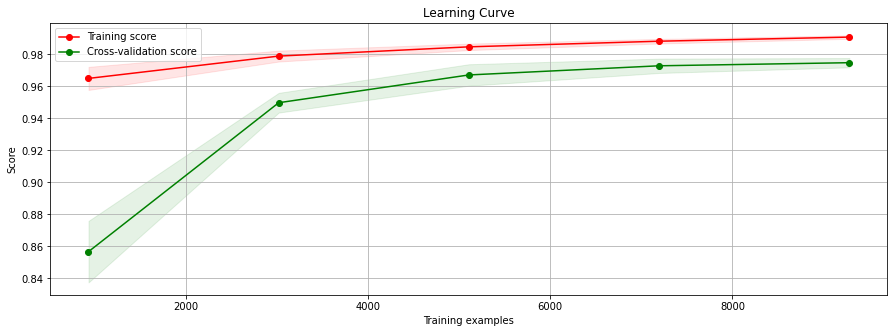

In [39]:
skplt.estimators.plot_learning_curve(model, X, y, figsize=(15, 5), cv=cv, scoring='accuracy');

Próba klasyfikacji

In [153]:
def model_gradio(Section, Byline, Title, Abstract):
  model = DecisionTreeClassifier(max_depth=15, random_state = 100)
  byline_g = le.transform(np.array(Byline).reshape(-1, 1)).item(0)
  abstract_g=np.mean(nlp(Abstract).vector)
  title_g=np.mean(nlp(Title).vector)
  sections = ['Arts', 'Automobiles', 'Books', 'Briefing', 'Business', 'Business Day', 'Climate', 'Crosswords & Games', 'Education','Fashion & Style', 'Food', 'Health',
      'Home & Garden', 'International Home', 'Magazine', 'Movies', 'New York', 'Obituaries', 'Opinion', 'Reader Center','Real Estate', 'Science', 'Special Series',
      'Sports', 'Style', 'Sunday Review','T Magazine', 'Technology', 'The Upshot','Theater', 'Times Insider', 'Travel','U.S.', 'Well', 'World', 'Your Money']
  sections_output = []
  for i in sections:
    if Section == i:
      sections_output.append(1)
    else:
      sections_output.append(0)  
  x = np.array([byline_g, sections_output, abstract_g,  title_g])
  #xscaled = scaler.transform(x.reshape(1,-1))
  #prediction = model.predict(xscaled)
  return x

In [225]:
def test(Section, Byline, Title, Abstract):
  model = DecisionTreeClassifier(max_depth=15, random_state = 100)
  byline_g = le.transform(np.array(Byline).reshape(-1, 1)).item(0)
  abstract_g=np.mean(nlp(Abstract).vector)
  title_g=np.mean(nlp(Title).vector)
  sections = ['Arts', 'Automobiles', 'Books', 'Briefing', 'Business', 'Business Day', 'Climate', 'Crosswords & Games', 'Education','Fashion & Style', 'Food', 'Health',
      'Home & Garden', 'International Home', 'Magazine', 'Movies', 'New York', 'Obituaries', 'Opinion', 'Reader Center','Real Estate', 'Science', 'Special Series',
      'Sports', 'Style', 'Sunday Review','T Magazine', 'Technology', 'The Upshot','Theater', 'Times Insider', 'Travel','U.S.', 'Well', 'World', 'Your Money']
  sections_output = []
  for i in sections:
    if Section == i:
      sections_output.append(1)
    else:
      sections_output.append(0)  

  lista_cech = []
  lista_cech = lista_cech.append(byline_g)
  #for j in sections_output:
   # lista_cech.append(j)
  #lista_cech = lista_cech.append(abstract_g, title_g)

  x = np.array([byline_g, sections_output, abstract_g,  title_g])
  return x

In [226]:
test("Arts",'By Li Yuan', "As the world overwhelmingly condemns the assault on Ukraine, online opinion in China is mostly pro-Russia, pro-war and pro-Putin.", "Why the Chinese Internet Is Cheering Russia’s Invasion"), 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(array([1836,
        list([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        -0.0054251733, 0.0038273712], dtype=object),)

In [211]:
lista = []
lista.append(byline_g)
lista

[1836]

In [174]:
demo = gr.Interface(
    fn=model_gradio,
    inputs=[gr.Radio(['Arts', 'Automobiles', 'Books', 'Briefing', 'Business', 'Business Day', 'Climate', 'Crosswords & Games', 'Education','Fashion & Style', 'Food', 'Health',
       'Home & Garden', 'International Home', 'Magazine', 'Movies', 'New York', 'Obituaries', 'Opinion', 'Reader Center','Real Estate', 'Science', 'Special Series',
       'Sports', 'Style', 'Sunday Review','T Magazine', 'Technology', 'The Upshot','Theater', 'Times Insider', 'Travel','U.S.', 'Well', 'World', 'Your Money']), 'text', 'text', 'text'],
    outputs=['number'],
    title='Is article top viewed?',
    #interpretation = default
)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`


KeyboardInterrupt: ignored

In [156]:
df['byline'][5]

'By Li Yuan'

In [91]:
df1['byline_le'].nunique()

3139

In [147]:
  #model = DecisionTreeClassifier(max_depth=15, random_state = 100)
  byline_g = le.transform(np.array('By Li Yuan').reshape(-1, 1)).item(0)
  abstract_g=np.mean(nlp("As the world overwhelmingly condemns the assault on Ukraine, online opinion in China is mostly pro-Russia, pro-war and pro-Putin.").vector)
  title_g=np.mean(nlp("Why the Chinese Internet Is Cheering Russia’s Invasion").vector)
  #x = np.array([byline_g, section, abstract_g,  title_g])
  x = np.array([byline_g, abstract_g,  title_g])
  xscaled = scaler.transform(x.reshape(1,-1))
  model.predict(xscaled)
  #prediction = model.predict(x.reshape(1, -1))


  #scaler = preprocessing.StandardScaler()
#X = scaler.fit_transform(get_X(df1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [145]:
x

array([ 1.83600000e+03,  3.82737117e-03, -5.42517332e-03])

In [146]:
x.reshape(1,-1)

array([[ 1.83600000e+03,  3.82737117e-03, -5.42517332e-03]])

In [127]:
np.array('By Li Yuan').reshape(-1, 1)

array([['By Li Yuan']], dtype='<U10')

In [129]:
le.transform(np.array('By Li Yuan').reshape(-1, 1)).item(0)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1836

In [63]:
X1=nlp(df['abstract'][2000])

In [61]:
type(df['abstract'][2000])

str

In [64]:
type(X1)

spacy.tokens.doc.Doc

In [65]:
X1

To better understand the plight of Afghan refugees, the reporter Matthieu Aikins undertook a journey with one. “The Naked Don’t Fear the Water” tells the story.

In [ ]:
#model.predict(X1.vector.reshape(1, -1))

NotFittedError: ignored

In [ ]:
#le.classes_

array(['all', 'top'], dtype=object)

#SIEĆ REKURENCYJNA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2)
n_features = X.shape[1]
n_classes = 2
print('X_train shape: ', X_train.shape) 
print('n_features: ', n_features) 
print('n_classes: ', n_classes) 

X_train shape:  (7221, 39)
n_features:  39
n_classes:  2


In [ ]:
model = models.Sequential()
model.add(layers.Dense(1, input_dim=n_features, activation='relu'))
model.add(layers.Dense(n_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 40        
                                                                 
 dense_15 (Dense)            (None, 2)                 4         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


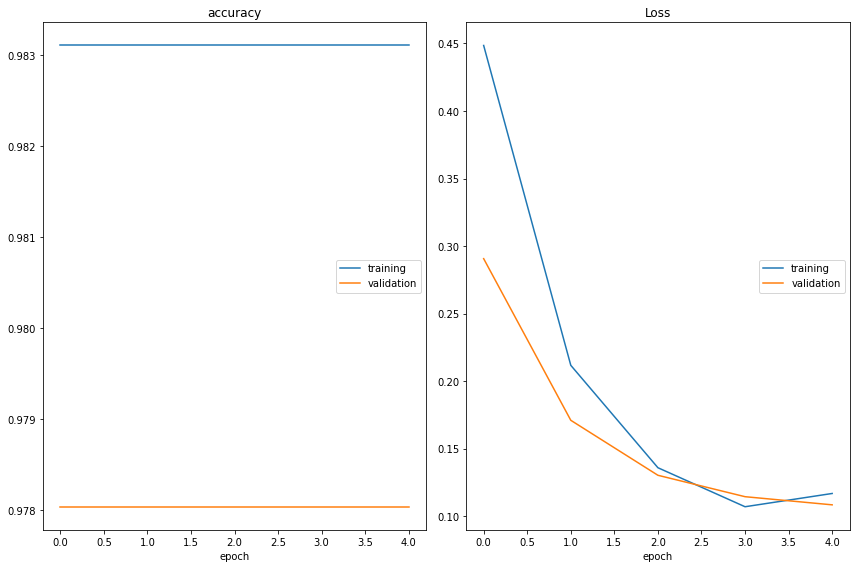

accuracy
	training         	 (min:    0.983, max:    0.983, cur:    0.983)
	validation       	 (min:    0.978, max:    0.978, cur:    0.978)
Loss
	training         	 (min:    0.107, max:    0.449, cur:    0.117)
	validation       	 (min:    0.108, max:    0.291, cur:    0.108)
723/723 [==============================] - 2s 3ms/step - loss: 0.1168 - accuracy: 0.9831 - val_loss: 0.1084 - val_accuracy: 0.9780


In [ ]:
model.fit(X_train, Y_train, batch_size=10, epochs=5, verbose=1, validation_data=(X_test, Y_test), callbacks=[PlotLossesKeras()])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.10839302837848663
Test accuracy:  0.9780361652374268


#NERY

In [ ]:
ent = df['abstract'].map(nlp).map(lambda x: x.ents)

In [ ]:
df['ner'] = ent.map(lambda e: [en.text for en in e])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Unnamed: 0,section,byline,title,abstract,class,ner
0,0,World,By Austin Ramzy,The Invasion of Ukraine: How Russia Attacked a...,Explosions thundered in Ukrainian cities short...,top,"[Ukrainian, Vladimir V. Putin]"
1,1,World,"By David D. Kirkpatrick, Maggie Astor and Cati...","Trump Praises Putin, Leaving Republicans in a ...","G.O.P. leaders, while condemning Russia’s inva...",top,"[Russia, Ukraine]"
2,2,Technology,By Davey Alba and Stuart A. Thompson,‘I’ll Stand on the Side of Russia’: Pro-Putin ...,After marinating in conspiracy theories and Do...,top,"[Donald J. Trump, Russia, Vladimir Putin]"
3,3,U.S.,"By David E. Sanger, Julian E. Barnes and Kate ...","As Tanks Rolled Into Ukraine, So Did Malware. ...",After years of talks about the need for public...,top,"[years, Ukraine]"
4,4,U.S.,By David E. Sanger and William J. Broad,"Putin Declares a Nuclear Alert, and Biden Seek...",When the Russian leader ordered his nuclear fo...,top,"[Russian, U.S.]"
...,...,...,...,...,...,...,...
10739,10960,Opinion,By Ross Douthat,The Ohio Primary and the Return of the Republi...,How the divides of the party’s 2016 primary ca...,all,[2016]
10740,10961,Books,By Mark Bowden,An Oil Tanker Is Sabotaged. The Investigator D...,In Matthew Campbell and Kit Chellel’s real-lif...,all,"[Matthew Campbell, Kit Chellel, Dead in the Wa..."
10741,10962,U.S.,By Isabella Grullón Paz,Jail Officer and Murder Suspect Missing After ...,The authorities in Alabama said it was unclear...,all,[Alabama]
10742,10963,Sports,By Alan Blinder,"C. Vivian Stringer, Celebrated College Basketb...","Stringer, who reached four Final Fours, won mo...",all,"[four, Final Fours, more than 1,000, half-cent..."


In [ ]:
#glove, fasttext, gradio - interface , scaler